<a href="https://colab.research.google.com/github/navin123456789/Nepal_Weather_Dataset/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Datasets/NepalWeatherData_labels.csv'
weather_data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
weather_data.head()

,DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1/1/1981,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,2.15,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1/2/1981,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,2.54,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,1/3/1981,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,3.32,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,1/4/1981,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,3.73,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,1/5/1981,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,4.93,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68


In [4]:
# Display basic information about the dataset
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883128 entries, 0 to 883127
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATE         883128 non-null  object 
 1   DISTRICT     883128 non-null  object 
 2   LAT          883128 non-null  float64
 3   LON          883128 non-null  float64
 4   PRECTOT      883128 non-null  float64
 5   PS           883128 non-null  float64
 6   QV2M         883128 non-null  float64
 7   RH2M         883128 non-null  float64
 8   T2M          883128 non-null  float64
 9   T2MWET       883128 non-null  float64
 10  T2M_MAX      883128 non-null  float64
 11  T2M_MIN      883128 non-null  float64
 12  T2M_RANGE    883128 non-null  float64
 13  TS           883128 non-null  float64
 14  WS10M        883128 non-null  float64
 15  WS10M_MAX    883128 non-null  float64
 16  WS10M_MIN    883128 non-null  float64
 17  WS10M_RANGE  883128 non-null  float64
 18  WS50M        883128 non-

In [5]:
# Describe the dataset to get basic statistical details
weather_data.describe()


,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
count,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000
mean,27.959677,84.277419,2.433753,82.896390,8.491043,55.657950,15.815832,5.428265,21.856533,11.061186,10.795352,15.539531,2.372512,4.673551,0.666903,4.006641,2.730587,4.643453,0.924084,3.719365
std,0.883261,2.181331,6.160721,10.707984,5.426636,22.877576,9.172463,10.850204,8.848121,9.353420,3.306661,9.924091,0.685488,1.355903,0.510857,1.300380,1.001095,1.509792,0.806458,1.282227
min,26.500000,80.200000,0.000000,54.730000,0.270000,4.040000,-25.440000,-28.190000,-16.940000,-37.240000,1.310000,-33.160000,0.470000,0.970000,0.000000,0.450000,0.650000,1.120000,0.000000,0.450000
25%,27.300000,82.400000,0.000000,77.680000,3.910000,36.540000,10.070000,-2.740000,16.550000,5.410000,8.250000,9.160000,1.900000,3.730000,0.310000,3.070000,2.070000,3.610000,0.400000,2.830000
50%,27.950000,84.300000,0.050000,83.720000,6.750000,54.320000,16.730000,4.980000,22.510000,11.980000,10.920000,16.530000,2.260000,4.520000,0.530000,3.910000,2.510000,4.340000,0.680000,3.520000
75%,28.500000,85.900000,1.870000,92.740000,13.170000,77.160000,22.500000,14.780000,27.940000,17.910000,13.210000,22.880000,2.710000,5.450000,0.870000,4.840000,3.100000,5.310000,1.170000,4.390000
max,30.000000,87.900000,177.790000,100.340000,23.270000,100.000000,38.610000,27.150000,46.820000,32.770000,25.520000,41.510000,13.570000,20.210000,8.360000,16.580000,15.710000,22.850000,10.940000,18.500000


In [6]:
# Check for missing values
weather_data.isnull().sum()

DATE           0
DISTRICT       0
LAT            0
LON            0
PRECTOT        0
PS             0
QV2M           0
RH2M           0
T2M            0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
dtype: int64

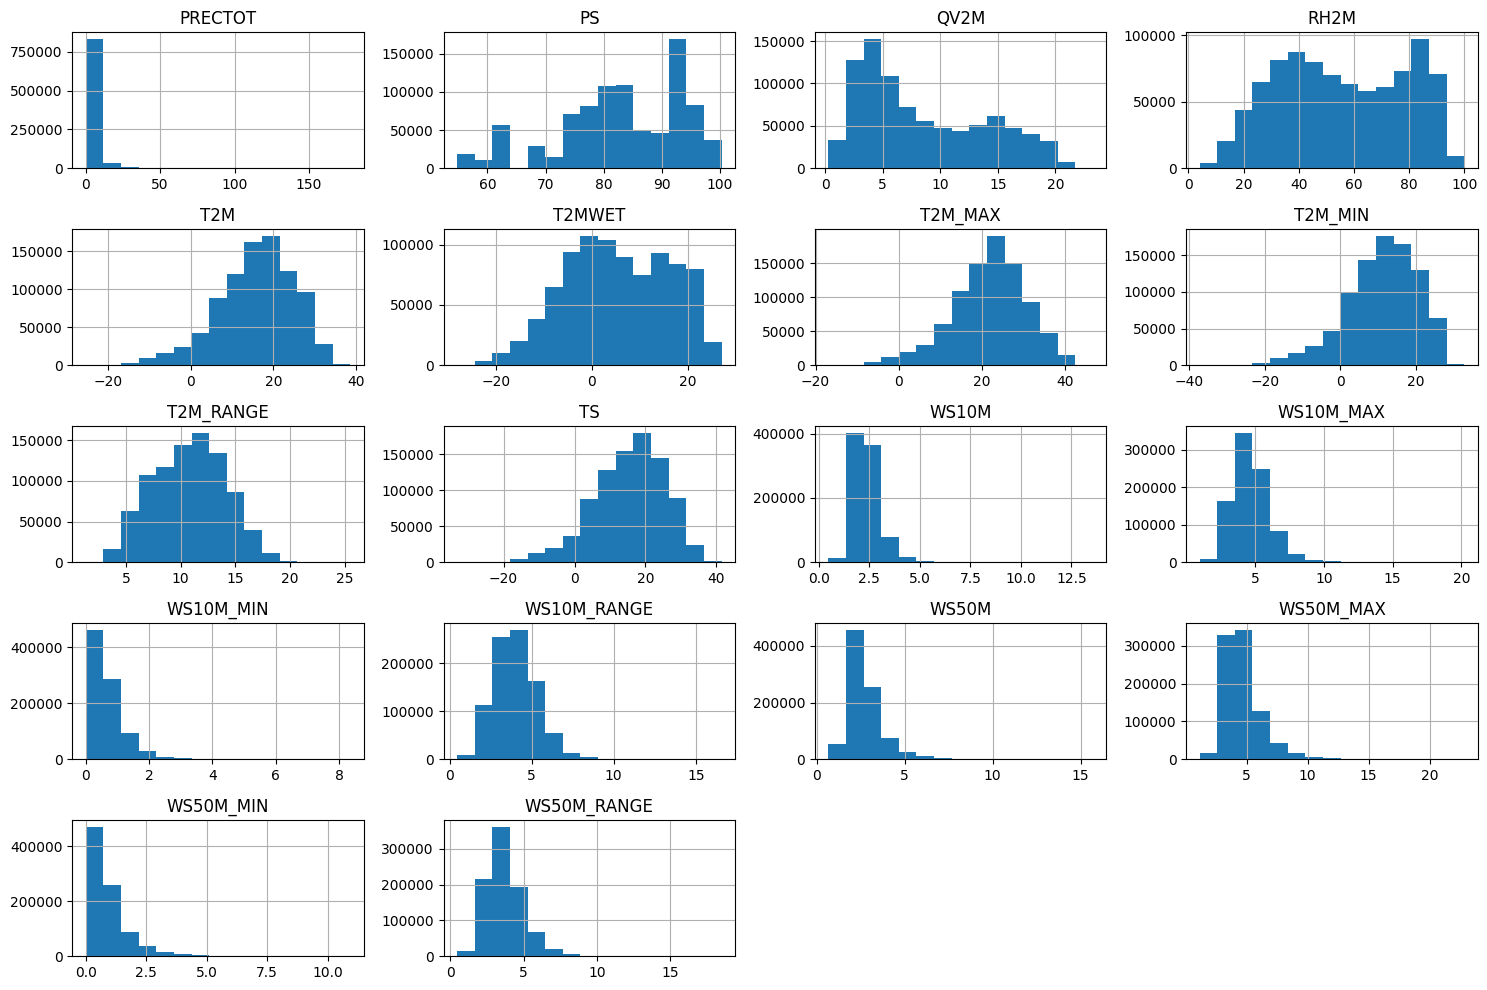

In [7]:
# Plot histograms for numeric columns
numeric_columns = ['PRECTOT', 'PS', 'QV2M', 'RH2M', 'T2M', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE']
weather_data[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

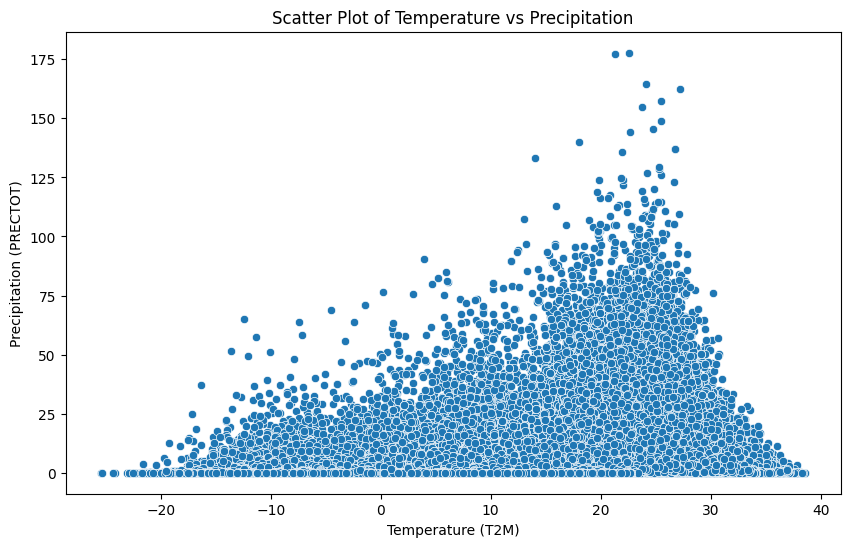

In [8]:
# Scatter plot to observe the relationship between temperature and precipitation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_data, x='T2M', y='PRECTOT')
plt.title('Scatter Plot of Temperature vs Precipitation')
plt.xlabel('Temperature (T2M)')
plt.ylabel('Precipitation (PRECTOT)')
plt.show()

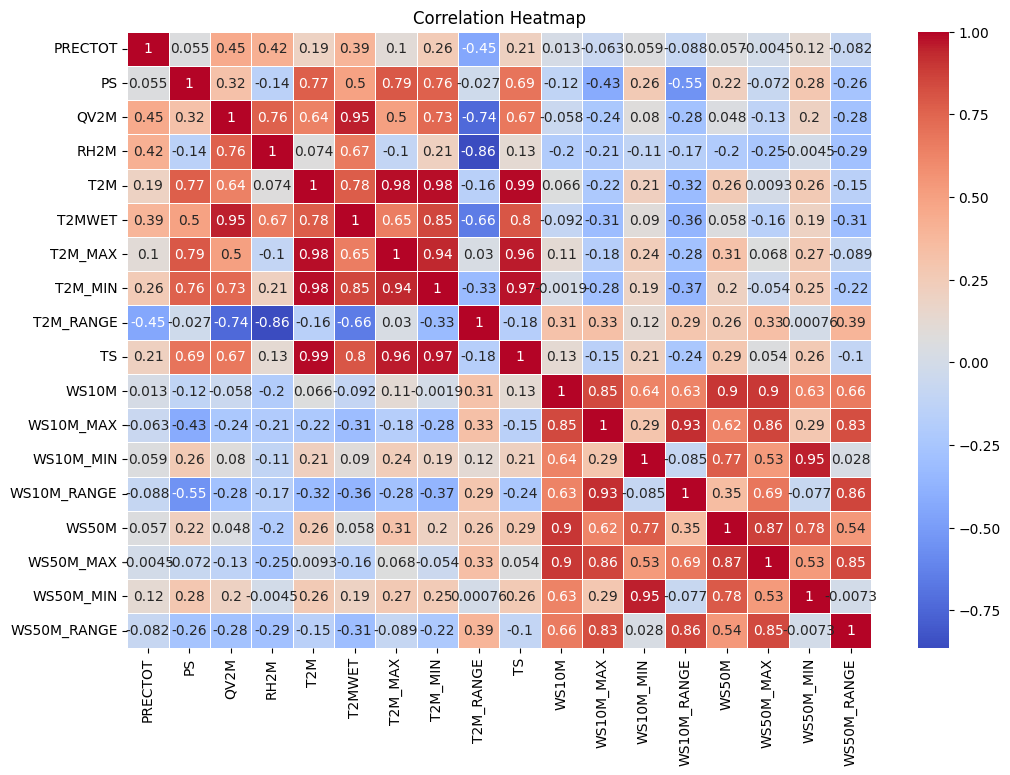

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = weather_data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

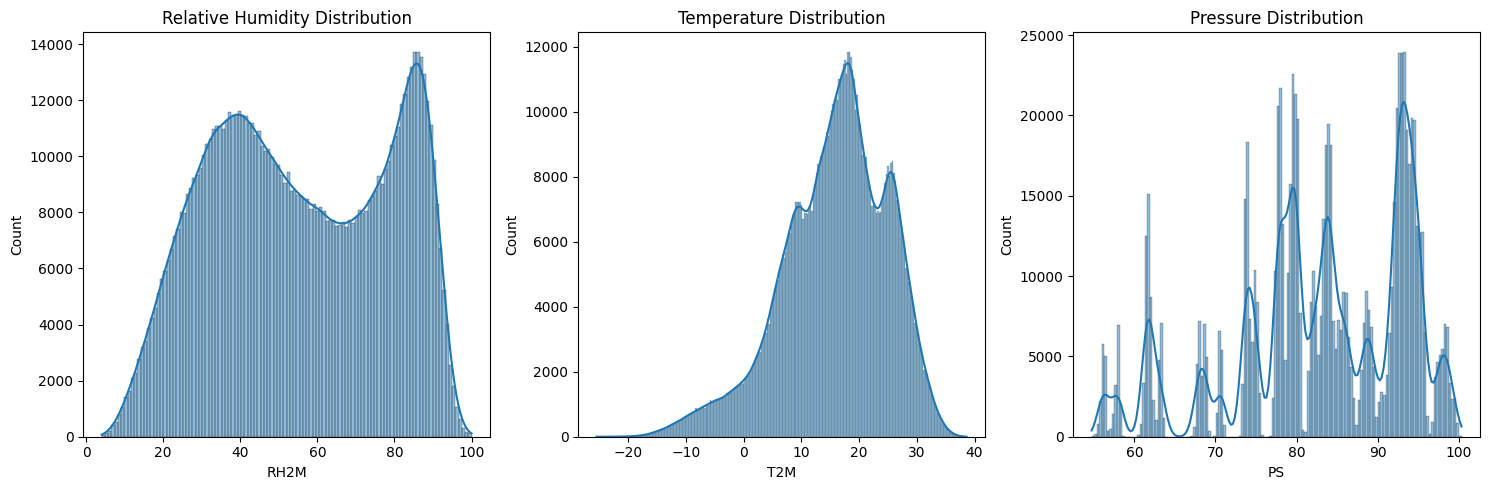

In [10]:
# Distribution of relative humidity, temperature, and pressure
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(weather_data['RH2M'], kde=True)
plt.title('Relative Humidity Distribution')

plt.subplot(1, 3, 2)
sns.histplot(weather_data['T2M'], kde=True)
plt.title('Temperature Distribution')

plt.subplot(1, 3, 3)
sns.histplot(weather_data['PS'], kde=True)
plt.title('Pressure Distribution')
plt.tight_layout()
plt.show()

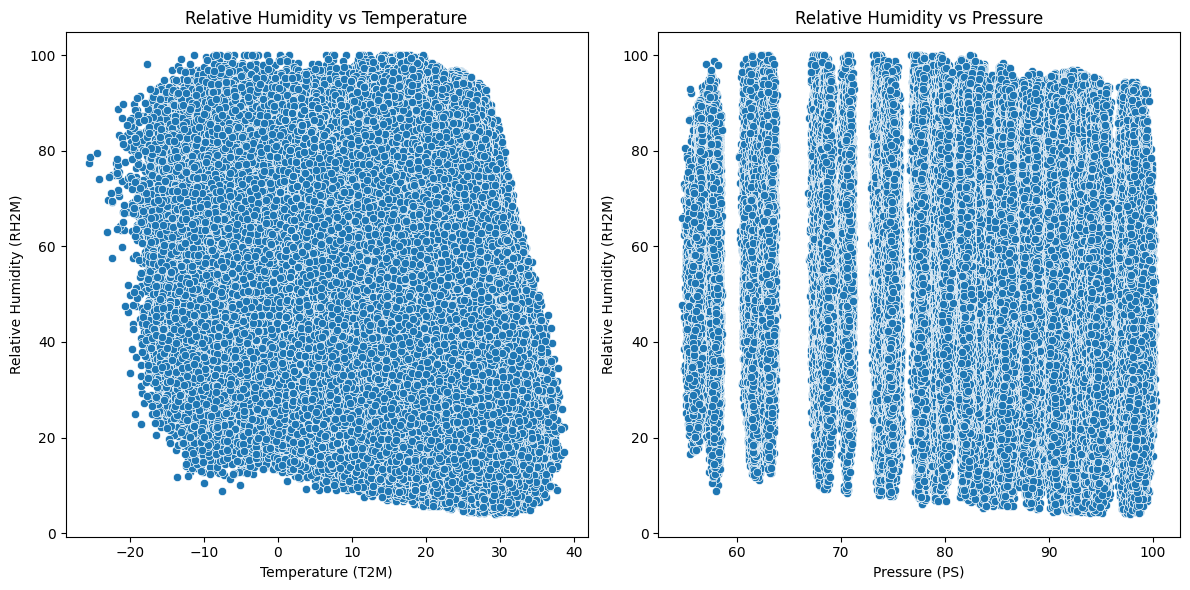

In [11]:
# Scatter plots of relative humidity vs temperature and pressure
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=weather_data, x='T2M', y='RH2M')
plt.title('Relative Humidity vs Temperature')
plt.xlabel('Temperature (T2M)')
plt.ylabel('Relative Humidity (RH2M)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=weather_data, x='PS', y='RH2M')
plt.title('Relative Humidity vs Pressure')
plt.xlabel('Pressure (PS)')
plt.ylabel('Relative Humidity (RH2M)')
plt.tight_layout()
plt.show()


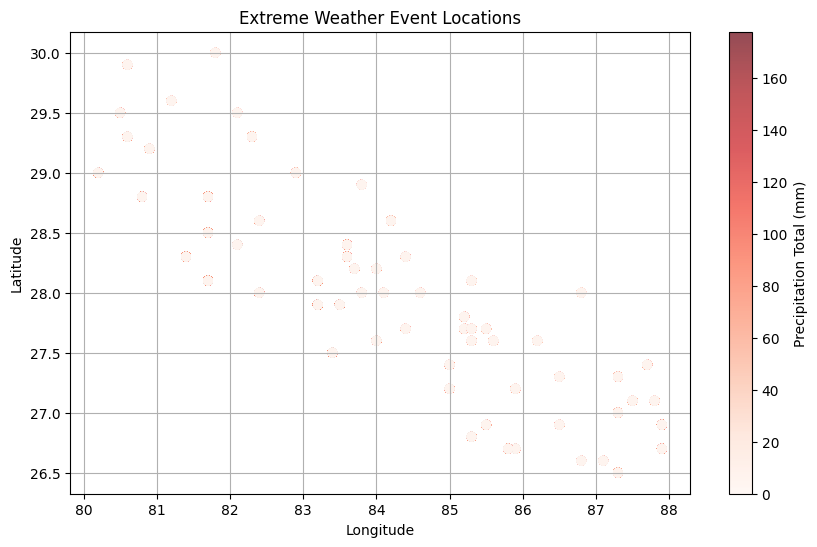

In [13]:
# Plotting extreme weather event locations on a map
plt.figure(figsize=(10, 6))
plt.scatter(weather_data['LON'], weather_data['LAT'], c=weather_data['PRECTOT'], cmap='Reds', alpha=0.7)
plt.colorbar(label='Precipitation Total (mm)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Extreme Weather Event Locations')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


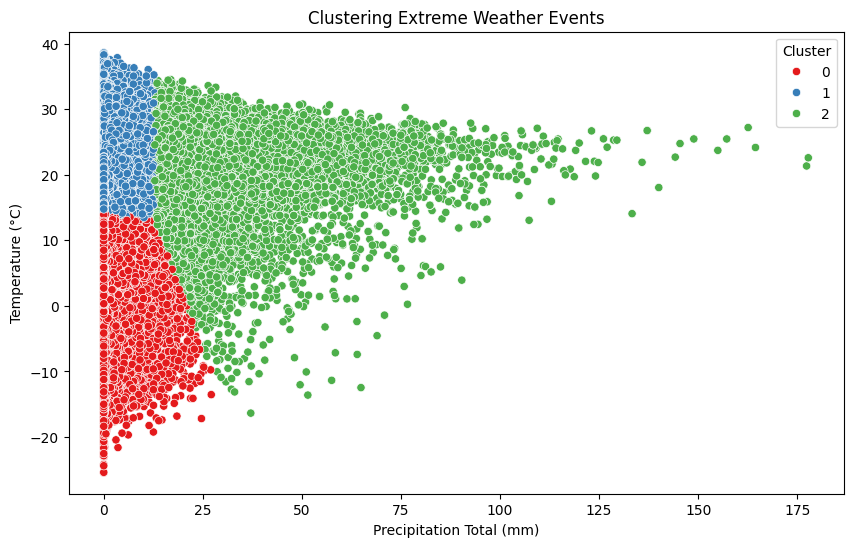

In [14]:
# Clustering
from sklearn.cluster import KMeans

# Example: Clustering based on precipitation and temperature
X = weather_data[['PRECTOT', 'T2M']]
kmeans = KMeans(n_clusters=3, random_state=42)
weather_data['Cluster'] = kmeans.fit_predict(X)

# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_data, x='PRECTOT', y='T2M', hue='Cluster', palette='Set1')
plt.xlabel('Precipitation Total (mm)')
plt.ylabel('Temperature (°C)')
plt.title('Clustering Extreme Weather Events')
plt.show()




In [15]:
# Regression Analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example: Predicting surface pressure (PS) based on other features
X = weather_data[['PRECTOT', 'T2M', 'QV2M', 'RH2M']]
y = weather_data['PS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:
# Predictions
y_pred = model.predict(X_test)

In [29]:
# Load the data into a pandas DataFrame
data = pd.DataFrame({
    'Actual': y_test,
    'Features': [', '.join(map(str, x)) for x in X_test.values]
})

# Add the predicted values to the DataFrame
data['Predicted'] = y_pred

# Display the DataFrame
print(data)

        Actual                    Features  Predicted
756449   90.54     0.0, 16.57, 1.84, 14.15  87.390356
734766   95.40    0.0, 24.52, 10.14, 50.17  91.751415
254377   62.14     4.25, 8.63, 8.39, 74.42  75.181452
757493   91.34     0.0, 13.17, 4.76, 45.98  82.326812
639385   78.92  26.23, 19.11, 16.18, 91.83  82.346289
...        ...                         ...        ...
400808   78.22     0.0, 18.35, 5.01, 29.75  87.625247
882279   94.66   2.27, 25.93, 19.87, 89.22  87.200577
168815   86.56     0.02, 15.7, 5.48, 42.61  84.627988
274563   74.00     0.0, 13.07, 7.65, 60.18  80.462738
426194   84.42     0.0, 12.99, 9.22, 83.09  80.112346

[176626 rows x 3 columns]


In [30]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 40.06053662137805


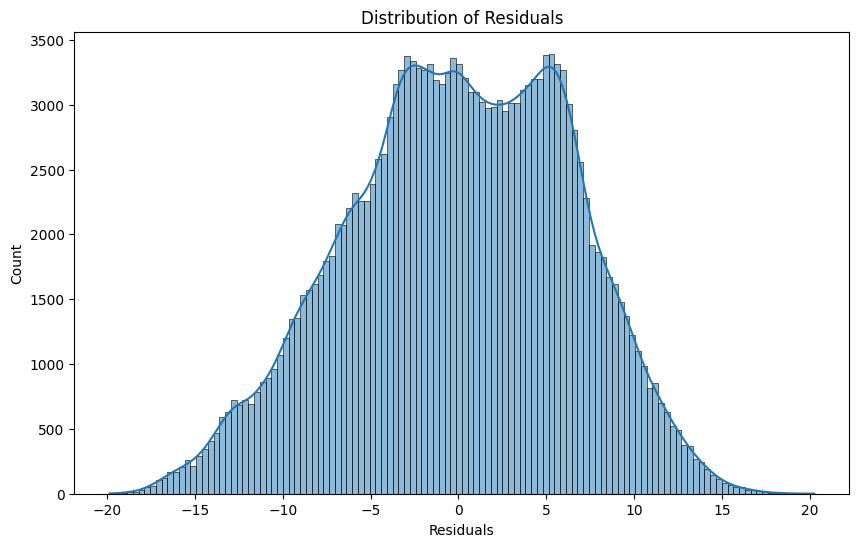

In [31]:
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

In [40]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 53.4 MB/s eta 0:00:00


In [42]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

             DATE   DISTRICT   LAT   LON  PRECTOT     PS   QV2M   RH2M    T2M  \
82003   7/11/2010       Bara  27.2  85.0    43.26  94.51  21.77  88.50  27.57   
99546   7/23/2019    Bardiya  28.3  81.4    39.85  93.95  22.06  87.97  27.78   
221884   7/9/2003    Dhanusa  26.7  85.9     9.59  97.21  21.55  87.23  28.13   
222656  8/19/2005    Dhanusa  26.7  85.9    11.27  97.28  21.39  87.82  27.91   
222657  8/20/2005    Dhanusa  26.7  85.9     8.74  97.18  21.02  86.81  27.79   
224114  8/16/2009    Dhanusa  26.7  85.9    10.67  97.60  20.83  86.88  27.70   
224451  7/19/2010    Dhanusa  26.7  85.9    18.43  97.38  20.96  87.27  27.69   
224483  8/20/2010    Dhanusa  26.7  85.9    17.65  97.88  20.90  86.86  27.81   
225908  7/15/2014    Dhanusa  26.7  85.9    12.33  97.11  21.84  88.18  28.16   
225937  8/13/2014    Dhanusa  26.7  85.9    28.25  96.97  22.67  90.00  28.41   
226308  8/19/2015    Dhanusa  26.7  85.9    30.09  97.35  21.80  90.33  27.75   
226998   7/9/2017    Dhanusa

<ipython-input-50-3027ca412491>:36: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


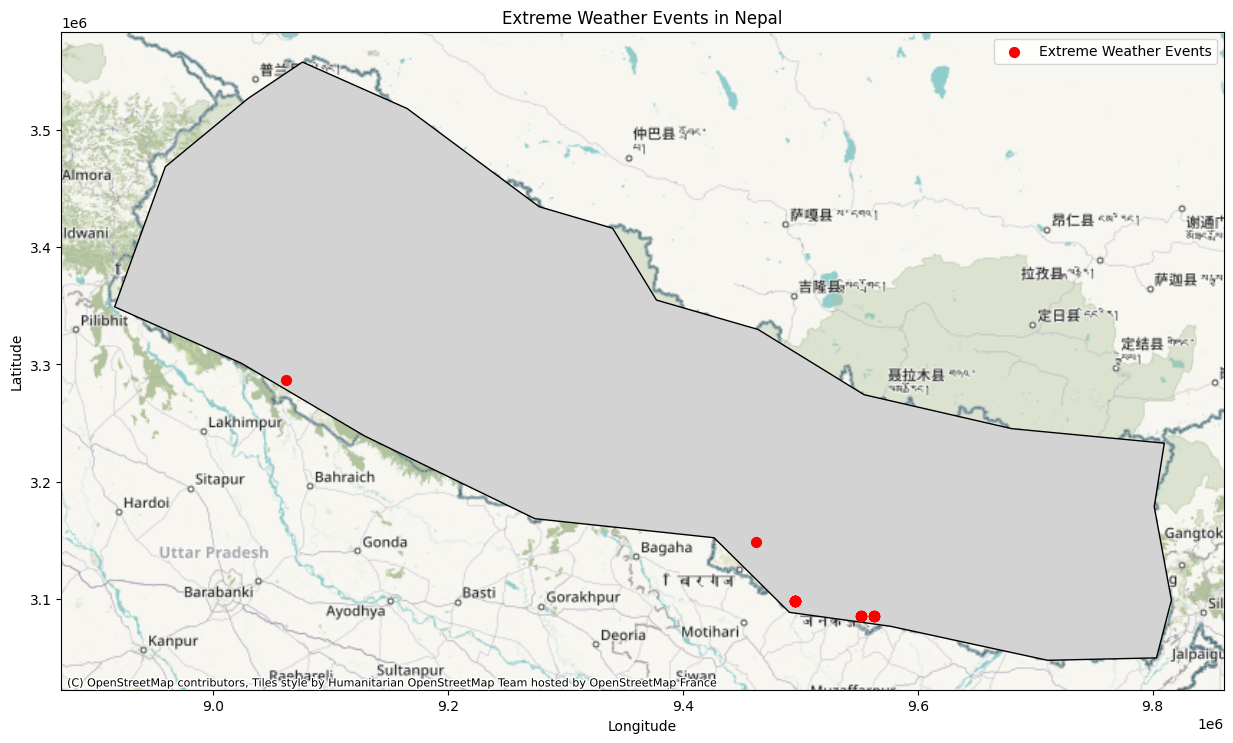

In [50]:
# Define extreme weather events as those with high precipitation and high temperatures
# extreme_events = weather_data[
#     (weather_data['PRECTOT'] > weather_data['PRECTOT'].quantile(0.95)) &
#     (weather_data['T2M'] > weather_data['T2M'].quantile(0.95))
# ]
# Assuming weather_data is a DataFrame containing the weather data

# Define thresholds based on quantiles
precipitation_threshold = weather_data['PRECTOT'].quantile(0.9)
temperature_threshold = weather_data['T2M'].quantile(0.9)
humidity_threshold = weather_data['RH2M'].quantile(0.9)
wind_speed_threshold = weather_data['WS10M'].quantile(0.9)
earth_skin_temp_threshold = weather_data['TS'].quantile(0.9)

# Filter extreme weather events based on the thresholds
extreme_events = weather_data[
    (weather_data['PRECTOT'] > precipitation_threshold) &
    (weather_data['T2M'] > temperature_threshold) &
    (weather_data['RH2M'] > humidity_threshold) &
    (weather_data['WS10M'] > wind_speed_threshold) &
    (weather_data['TS'] > earth_skin_temp_threshold)
]

# Create a GeoDataFrame for extreme weather events
geometry = [Point(xy) for xy in zip(extreme_events['LON'], extreme_events['LAT'])]
gdf = gpd.GeoDataFrame(extreme_events, geometry=geometry)

# Set the CRS for the GeoDataFrame (assuming the coordinates are in WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Use the Natural Earth dataset provided within geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extract Nepal from the world GeoDataFrame
nepal = world[world.name == 'Nepal']

# Plotting the extreme weather events on the Nepal map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
nepal.to_crs(epsg=3857).plot(ax=ax, color='lightgray', edgecolor='black')  # Convert to Web Mercator projection
gdf.to_crs(epsg=3857).plot(ax=ax, markersize=50, color='red', marker='o', label='Extreme Weather Events')

# Add a basemap
ctx.add_basemap(ax, crs=nepal.to_crs(epsg=3857).crs)

plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Extreme Weather Events in Nepal')
plt.show()

<ipython-input-52-7efa4eeb839c>:27: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


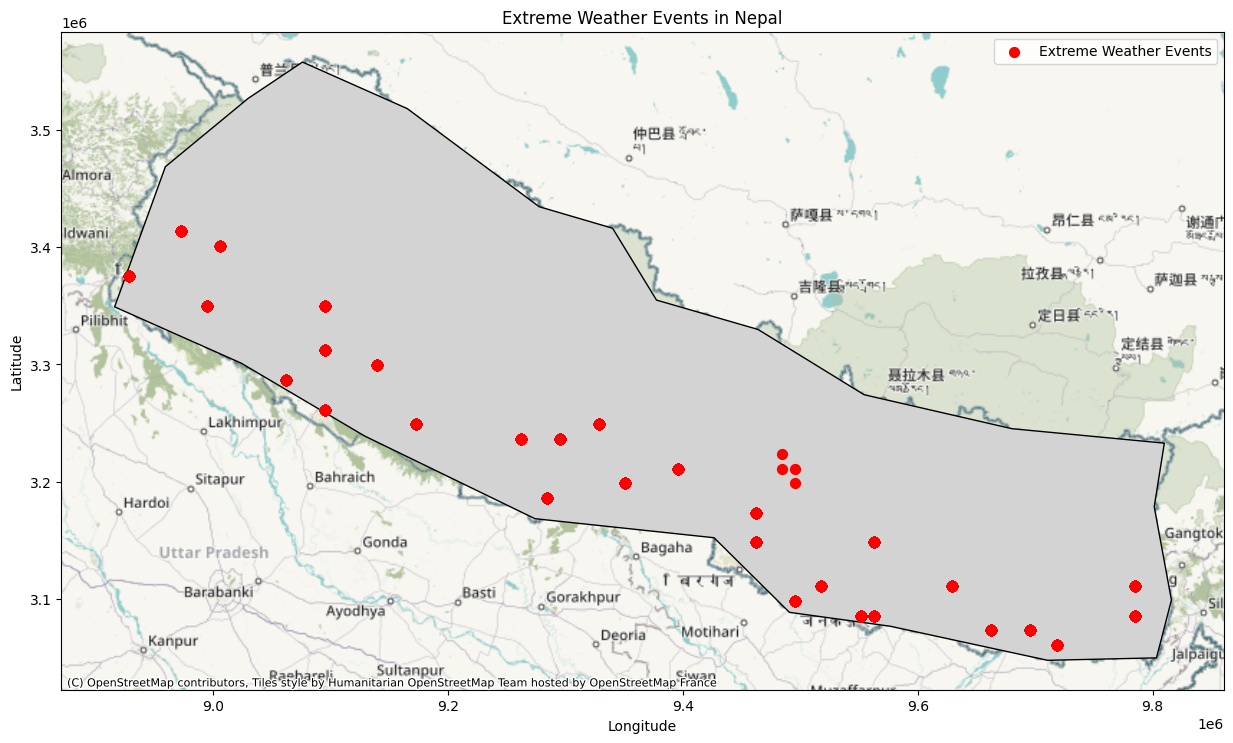

In [52]:
# Define extreme weather events as those with high temperatures

# Define thresholds based on quantiles

temperature_threshold = weather_data['T2M'].quantile(0.9)
earth_skin_temp_threshold = weather_data['TS'].quantile(0.9)

# Filter extreme weather events based on the thresholds
extreme_events = weather_data[
    (weather_data['T2M'] > temperature_threshold) &
    (weather_data['TS'] > earth_skin_temp_threshold)
]

# Create a GeoDataFrame for extreme weather events
geometry = [Point(xy) for xy in zip(extreme_events['LON'], extreme_events['LAT'])]
gdf = gpd.GeoDataFrame(extreme_events, geometry=geometry)

# Set the CRS for the GeoDataFrame (assuming the coordinates are in WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Use the Natural Earth dataset provided within geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extract Nepal from the world GeoDataFrame
nepal = world[world.name == 'Nepal']

# Plotting the extreme weather events on the Nepal map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
nepal.to_crs(epsg=3857).plot(ax=ax, color='lightgray', edgecolor='black')  # Convert to Web Mercator projection
gdf.to_crs(epsg=3857).plot(ax=ax, markersize=50, color='red', marker='o', label='Extreme Weather Events')

# Add a basemap
ctx.add_basemap(ax, crs=nepal.to_crs(epsg=3857).crs)

plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Extreme Temperature in Nepal')
plt.show()